## Project 2 - Programming for Data Analysis

### Course: HDip in Computing in Data Analytics
### Module: Programming for Data Analysis
### Student: Sarah Hastings
### Student Number: G00235562
***

### Project Outline & Detail - An analysis of paleo-present climate data

• Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

• Examine Irish context: Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)

• Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats

• For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).

• Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue

• Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice coverage)

### Introduction - Paleoclimatology
Paleoclimatology is the scientific study of previous climates, during Earth's different geologic ages, predating the invention of meteorological instruments, when no direct measurement data were available. This study allows us to try to identify the causes of climate change and trends in the past to better understand our present and future climate.

![image](./data/thumbnail_big.jpg)

Paleoclimatology data are derived from natural sources such as tree rings, cave deposits, ice cores, fire history, coral growth bands, pollen, stalagmites, and ocean and lake sediments. These proxy climate data extend the weather and climate information archive by hundreds to millions of years. This is the world's largest archive of paleoclimatology data, with contributions from the international scientific community. The data include geophysical or biological measurement time series and some reconstructed climate variables such as temperature and precipitation.
    
The time span "800,000 years to present" refers to a geological and climatological timeframe. In this context, it likely pertains to the study of paleoclimate data, which involves analyzing climate conditions, atmospheric composition, and other environmental factors over an extended period.

When researchers refer to "800,000 years to present," they are typically looking at various proxies and records, such as ice cores, sediment layers, tree rings, and other indicators, to reconstruct and understand Earth's climate history. This extensive time frame allows scientists to investigate long-term climate trends, natural variations, and the impact of different factors on the Earth's climate system.

In the context of the previous question regarding the analysis of CO2 versus temperature anomaly over this period, it suggests a comprehensive study of the interplay between greenhouse gas concentrations and temperature variations throughout a significant portion of Earth's history.

Scientists can also drill into ice sheets and extract ice cores to analyze deposits trapped within the ice, such as pollen and gas. This allows them to better understand atmospheric and climatic conditions that existed when particular layers of the sheet formed. All of this proxy data is synthesized to develop an understanding of Earth’s climate over different geologic periods.

The field of paleoclimatology has taught scientists that the climate of Earth is in a perpetual state of change. Research has revealed that there have been several ice ages as well as several periods of global warming in Earth's history. Additionally, scientists have determined that there can be both short- and long-term trends in climate. For instance, while climate change can occur—and often has occurred—over an extended amount of time, paleoclimatologists have also recorded shorter warming periods during an ice age. Scientists have become aware that Earth is very dynamic and that past events might help us better understand the past and prepare for future climate changes.

Paleoclimatology has also helped scientists study and understand how other environmental factors, such as continental drift, solar energy, greenhouses gases in the atmosphere, and the variation in Earth’s orbit have all affected the climate of Earth over time. The science of paleoclimatology is vital to our understanding of climate on Earth. As scientists become increasingly aware of how climates have been influenced in the past, they can develop models that help predict how increased carbon dioxide levels and other changes might impact the climate of Earth in the future.

The science of paleoclimatology is important for past, contemporary, and future issues. Understanding past climate helps us to explain how current ecosystems came to be. For example, climate typically controls what types of vegetation grow in a particular area. Furthermore, paleoclimatology provides data that we can use to model and predict both current and future climate change scenarios. Computer models can be used to study the potential effect of increased atmospheric carbon dioxide on climate.

With a system as complex as Earth's climate, it is a daunting task for scientists to be able to make projections about future climate changes and how it may affect the distribution of plants and animals. However, paleoclimate data are used as a foundation for climate scientists by providing crucial information such as rates of past climate change and how vegetation and animal populations responded to the change. Computer models can be used predict different future climate patterns, and paleoclimate data provides a useful framework from which to base these models. For more information about climate proxies and climate change, see the collections of web-based materials below

Based on air bubbles trapped in mile-thick ice cores and other paleoclimate evidence, we know that during the ice age cycles of the past million years or so, atmospheric carbon dioxide never exceeded 300 ppm. Before the Industrial Revolution started in the mid-1700s, atmospheric carbon dioxide was 280 ppm or less.

### Importing libraries

In [1]:
# Import pandas to allow for data analysis, manipulation, work with dataframes
import pandas as pd
# Use Pyplot, part of the Matplotlib library to visualize diagrams/use for visual data/plots etc 
import matplotlib.pyplot as plt
# Import numpy to work with numerical data, arrays
import numpy as np
# Importing seaborn gives a variety of visualization patterns in addition to matplotlib
import seaborn as sns
# Import for operating system related tasks
import os
# Useful for plotting visual relationships between data 
from pandas.plotting import andrews_curves
# Split the dataset into train and test models
from sklearn.model_selection import train_test_split
# Training model
from sklearn.preprocessing import StandardScaler
# Classification and Logistic regression
from sklearn.linear_model import LogisticRegression
# View accuracy/predictability
from sklearn.metrics import accuracy_score,confusion_matrix

### Analyse CO2 vs Temperature Anomaly from 800kyrs – present

This project aims to provide an analysis into CO2 and temporature anomalies from 800kyrs – present. I will also examine methane CH4 contentrations trends over time. I will examine the irish content while looking at rainfall time series data and trends over time. I will combine the datasets into dataframes, exporting to csv, json formats, examine features, variables and trends over time while also aim to predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue.


 how changes in atmospheric carbon dioxide levels correspond to variations in temperature anomalies. This relationship is crucial in understanding the impact of greenhouse gas emissions on the Earth's climate
 
 Positive Relationship: An increase in CO2 levels is often associated with a positive temperature anomaly, indicating a warming trend. This aligns with the concept of the greenhouse effect, where higher concentrations of greenhouse gases trap more heat in the atmosphere.

Negative Relationship: While the overall trend is positive, variations may exist due to other factors influencing climate, such as natural climate variability, solar radiation, or volcanic activity.

 exploration of the correlation between atmospheric CO2 levels and variations in temperature anomalies over time, providing insights into the impact of human-induced greenhouse gas emissions on global climate pattern
 
 
deuterium used as temp - compared co2 methane other greenhouse gases etc - see changes over time and effects on climate change and correlations between them

mauan loa - recording co2 levels, longest record of measurements - track ch4 also

targets set to keep temp lower than 1.5/2



### CO2 Analysis & Data

When analysing CO2 data and trends over time there are two main sources used in this project. I will import each dataset and all datasets used in this project will be available in the data folder of this repository. 

The first is dataset examined is from Lüthi, D et al. (2008) - High-resolution carbon dioxide concentration record 650,000–800,000 years before present, https://www.nature.com/articles/nature06949, also known as The European Project for Ice Coring in Antarctica Dome ice core from Dome C (EDC), which serves as the foundation for modern studies on the historical cycles of CO2 levels. This dataset covers a time span of 800,000 years, with the data extending up to 137 years BP (Before Present), where the year considered as "present" is 1950.

The second dataset used in CO2 analysis is provided by The Intergovernmental Panel on Climate Change ("IPCC"). This dataset has atmospheric Co2 values from 800,000 years bp up until 2001, https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls. This dataset is a revision of the earlier EPICA Dome C CO2 record from 800 to 600 kyr before present. Lüthi et al., 2008, formed the foundation of our understanding of the historical trends in atmospheric CO2. However, this dataset has now been superseded by the updated Composite CO2 record presented in Bereiter et al., 2014. The new air extraction methods and sections of the European Project for Ice Coring in Antarctica Dome ice core from Dome C (EDC) allowed a more accurate reconstruction of atmospheric CO2 concentrations spanning the past 800,000 years.
 
### Lüthi, D et al. (2008) - High-resolution carbon dioxide concentration record 650,000–800,000 years before present  https://www.nature.com/articles/nature06949

In 2008, Dieter Lüthi and other scientists pubished a paper that extended the ice core record of atmospheric CO2 concentrations from 650,000 years before present to 800,000 years before present. The research is based on ice core data extracted from Antarctica, specifically from the EPICA Dome C ice core, analyzing the lowest 200 metres of the ice core drilled at EPICA Dome C in Antarctica. Ice cores act as natural archives, preserving information about past atmospheric conditions. In this study, the researchers focused on measuring and analyzing CO2 concentrations in air bubbles trapped within the ice layers. By examining these samples with high precision, scientists were able to reconstruct the long-term history of CO2 levels, providing insights into natural climate variability over an extended geological timescale.

The findings of the study contribute valuable information to our understanding of past climate dynamics, helping scientists comprehend the natural variations in greenhouse gas concentrations and their relationship to climate change. Such records are crucial for assessing the impact of human activities on the current rise in atmospheric CO2 and its implications for future climate scenarios.

Scientists found that atmospheric concentrations correlated strongly with Antarctic temperature throughout the eight glacial cycles in the 800,000 year ice core record.  They report a reading of 172 parts per million (ppm) CO2 as the lowest CO2 concentration ever recorded in an ice core--about 10 ppm lower than the previous lowest reading.

The dataset is comprised of the below
* Composite CO2 record (0-800 kyr BP)	
* 0-22 kyr BP:	Dome C (Monnin et al. 2001) measured at University of Bern
* 22-393 kyr BP:	Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble
* 393-416 kyr BP:	Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble
* 416-664 kyr BP:	Dome C (Siegenthaler et al. 2005)  measured at University of Bern
* 664-800 kyr BP:	Dome C (Luethi et al. (sub)) measured at University of Bern

The dataset age is based on the EDC3 age scale (years before year 1950) and goes up to the year 137bp this equates to the year 1813, I will convert the years below. You can see from the below max age of 1813 and the CO2 min of 172 and max of 299.  

In [2]:
# Luthi Composite CO2 Data
# Path to file
file_path = './data/41586_2008_BFnature06949_MOESM31_ESM.xls'

# Read the file into a Pandas DataFrame
luthi = pd.read_excel(file_path, sheet_name='3.  Composite CO2', skiprows=6, index_col=None)
#print(luthi.isnull().sum())
#print(luthi.describe())

# Filter for necessary columns to correct icecore year
luthi['Year'] = 1950 - (luthi['EDC3_gas_a (yr)'].astype(int))
print(luthi.head())
print(luthi.describe())                 

   EDC3_gas_a (yr)  CO2 (ppmv)  Year
0              137       280.4  1813
1              268       274.9  1682
2              279       277.9  1671
3              395       279.1  1555
4              404       281.9  1546
       EDC3_gas_a (yr)   CO2 (ppmv)           Year
count      1096.000000  1096.000000    1096.000000
mean     390905.979015   230.835675 -388955.979015
std      262092.947239    27.573616  262092.947239
min         137.000000   171.600000 -796562.000000
25%      137133.500000   207.500000 -625458.000000
50%      423206.500000   231.450000 -421256.500000
75%      627408.000000   251.525000 -135183.500000
max      798512.000000   298.600000    1813.000000


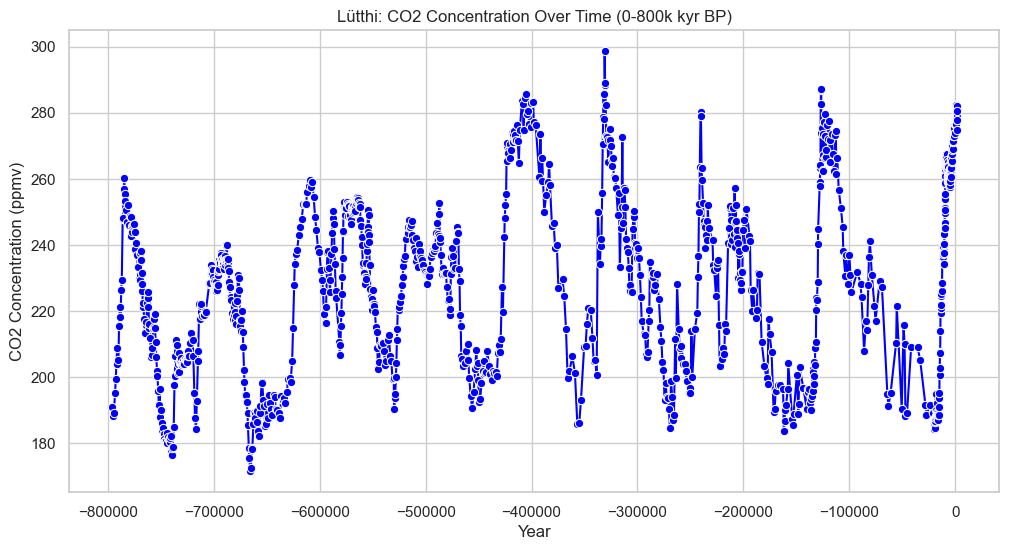

In [3]:
# Plot the data
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 (ppmv)', data=luthi, marker='o', color='blue', ci=None)

# Reverse the x-axis
#plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Lütthi: CO2 Concentration Over Time (0-800k kyr BP)')
plt.show() 

### IPCC Data - C02 Composite Antartic Ice Core

The second CO2 dataset, the European Project for Ice Coring in Antarctica Dome ice core from Dome C (EDC): Bereiter et al. (2014) is the new version of CO2 composite replacing the old version of Lüthi et al. (2008), using different air extraction methods and sections of the core allowing for a more accurate reconstruction of atmospheric CO2 concentrations spanning the past 800,000 years.

The data is comprised of 
* Composite CO2 record (0-800 kyr BP)	
* -51-1800 yr BP:'	Law Dome (Rubino et al., 2013)
* 1.8-2 kyr BP:	Law Dome (MacFarling Meure et al., 2006)
* 2-11 kyr BP:	Dome C (Monnin et al., 2001 + 2004)
* 11-22 kyr BP:	WAIS (Marcott et al., 2014) minus 4 ppmv (see text)
* 22-40 kyr BP:	Siple Dome (Ahn et al., 2014)
* 40-60 kyr BP:	TALDICE (Bereiter et al., 2012)
* 60-115 kyr BP:	EDML (Bereiter et al., 2012)
* 105-155 kyr BP:	Dome C Sublimation (Schneider et al., 2013)
* 155-393 kyr BP:	Vostok (Petit et al., 1999)
* 393-611 kyr BP:	Dome C (Siegenthaler et al., 2005)
* 612-800 kyr BP:	Dome C (Bereiter et al., 2014)

The age unit is in years before present (yr BP) whereas present refers to 1950, it has a minimum year value of -51 which equates to the year 2001. The CO2 values show a min value of 174 ppm and highest value of 368 ppm. 

In [4]:
# IPCC Composite CO2 Data
# Specify the path to your Excel file
file_path = './data/grl52461-sup-0003-supplementary.xls'

# Read the specified sheet into a Pandas DataFrame
ipcc = pd.read_excel(file_path, sheet_name='CO2 Composite', skiprows=14, index_col=None)

# Filter for necessary columns to correct icecore year
ipcc['Year'] = 1950 - (ipcc['Gasage (yr BP) '].astype(int))
#print(ipcc.head())
print(ipcc.describe())

       Gasage (yr BP)    CO2 (ppmv)  sigma mean CO2 (ppmv)           Year
count      1901.000000  1901.000000            1901.000000    1901.000000
mean     242810.270113   235.566624               1.340519 -240859.801157
std      274261.195468    35.902698               0.924188  274261.156213
min         -51.030000   173.713620               0.010000 -803718.000000
25%       14606.209000   204.826743               0.639335 -502227.000000
50%       74525.645000   232.456008               1.073871  -72575.000000
75%      504177.187879   257.930000               1.800000  -12656.000000
max      805668.868405   368.022488               9.960000    2001.000000


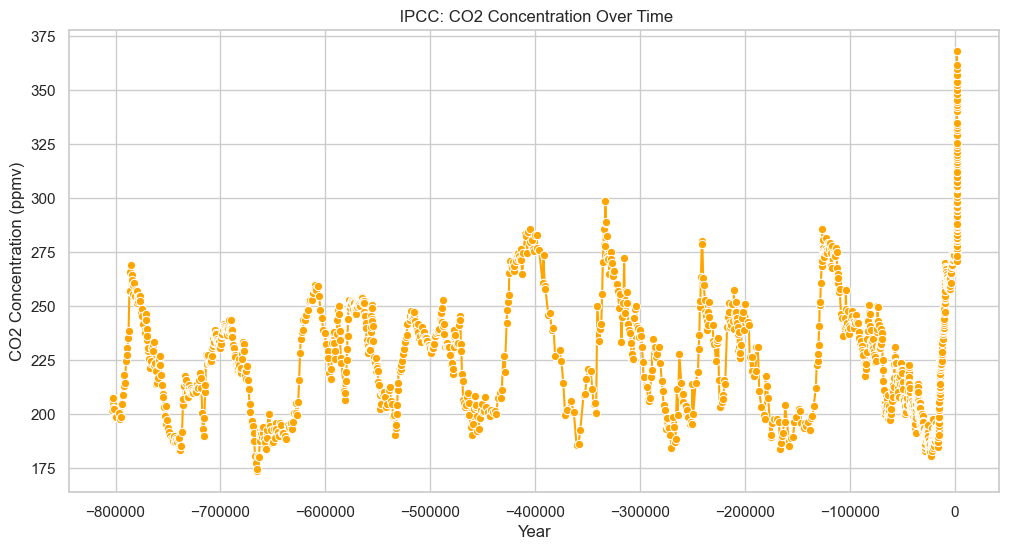

In [5]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 (ppmv)', data=ipcc, marker='o', color='orange', ci=None)

# Reverse the x-axis
#plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title(' IPCC: CO2 Concentration Over Time')

plt.show()

### Compare Luthi & IPCC

I will plot both datasets to compare these and note any trends or differences. One notable difference is in the aging and years, Luthi contains data to the year 137bp, 1813, whereas IPCC goes up to -51bp, 2001.

They follow a similar trend for most, with some overlapping in periods while also showing slight differences between -800kyr and -600kyr, and -400kyr and -300kyr.

The European Project for Ice Coring in Antarctica Dome ice core from Dome C (EDC): Bereiter et al. (2014) used different air extraction methods and sections of the core allowing for a more accurate reconstruction of atmospheric CO2 concentrations and explain the differences that can be seen. This project allowed for the remeasurements of the CO2 concentration in the deepest/oldest part of the EDC ice core and revealed an extraction bias in previously published records using the Bern cracker system. The offset is smaller than 12.5 ppm and confined to the bottom 200 m of the core. 

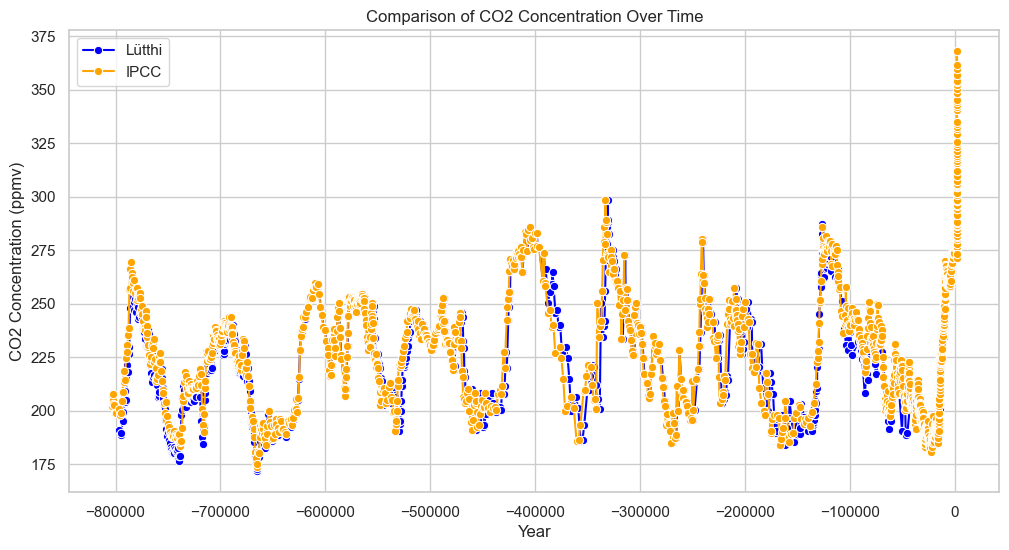

In [6]:
#Compare Luthi & IPCC
# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data from the first DataFrame (luthi)
sns.lineplot(x='Year', y='CO2 (ppmv)', data=luthi, marker='o', color='blue', ci=None, label='Lütthi', ax=ax)

# Plot data from the second DataFrame (ipcc)
sns.lineplot(x='Year', y='CO2 (ppmv)', data=ipcc, marker='o', color='orange', ci=None, label='IPCC', ax=ax)

# Reverse the x-axis if needed
#plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Comparison of CO2 Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Bring up CO2 further up to date

I will now bring the CO2 data up to date, using data from the NOAA/Mauna Loa record, https://gml.noaa.gov/aftp/products/trends/co2/. I will combine this data with the IPCC as this is the most accurate, starting from the year 1959. 

This contains data from 1959 - 2023 measured at Mauna Loa Observatory, Hawaii. The carbon dioxide data on Mauna Loa constitute the longest record of direct measurements of CO2 in the atmosphere. They were started by C. David Keeling of the Scripps Institution of Oceanography in March of 1958 at a facility of the National Oceanic and Atmospheric Administration [Keeling, 1976]. NOAA started its own CO2 measurements in May of 1974, and they have run in parallel with those made by Scripps since then [Thoning, 1989].

The file consists of the year, the annual mean and a column called unc. CO2 expressed as a mole fraction in dry air. The estimated uncertainty in the annual mean is the standard deviation of the differences of annual mean values determined independently by NOAA/ESRL and the Scripps Institution of Oceanography.

This data highlights the continuous upward trend in CO2 levels, with the highest record of 421ppm. 

Year          0
CO2 (ppmv)    0
unc           0
dtype: int64
             Year  CO2 (ppmv)           unc
count    65.00000   65.000000  6.500000e+01
mean   1991.00000  359.259385  1.200000e-01
std      18.90767   31.324085  9.790051e-17
min    1959.00000  315.980000  1.200000e-01
25%    1975.00000  331.130000  1.200000e-01
50%    1991.00000  355.700000  1.200000e-01
75%    2007.00000  384.020000  1.200000e-01
max    2023.00000  421.080000  1.200000e-01


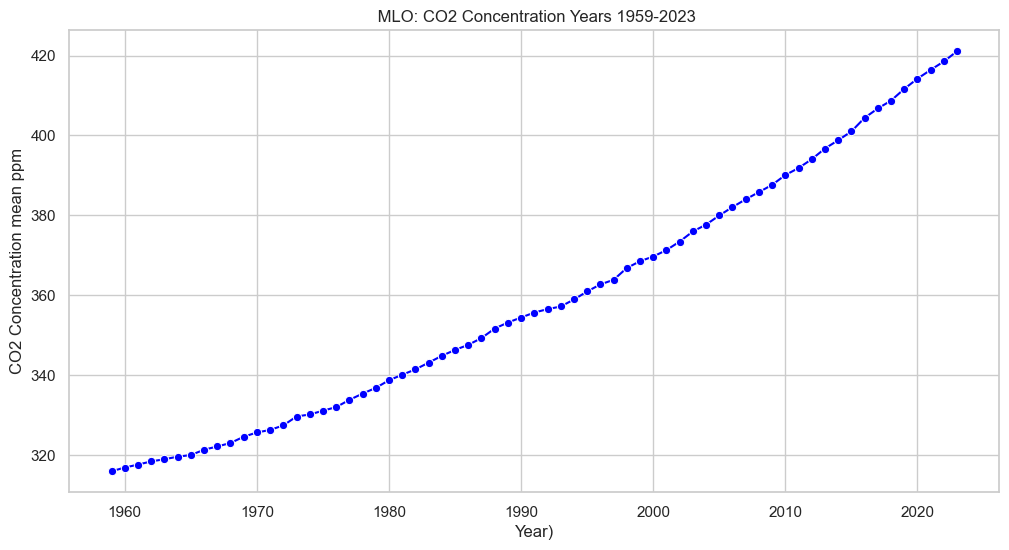

In [7]:
# Bring CO2 Data up to recent years, import and view data first
# Specify the path to your Excel file
file_path = './data/co2_annmean_mlo.csv'

# Read the specified sheet into a Pandas DataFrame
co2mlo = pd.read_csv(file_path, skiprows=43, index_col=None)
# Rename columns
co2mlo = co2mlo.rename(columns={'year': 'Year', 'mean': 'CO2 (ppmv)'})

print(co2mlo.isnull().sum())
print(co2mlo.describe())
co2mlo.head()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 (ppmv)', data=co2mlo, marker='o', color='blue', ci=None)

# Adding labels and title
plt.xlabel('Year)')
plt.ylabel('CO2 Concentration mean ppm')
plt.title(' MLO: CO2 Concentration Years 1959-2023')
plt.show()

In [8]:
# Combine IPCC with MLO 
# Select columns from ipcc and filter rows up to and including 1958
ipcc_selected = ipcc.loc[ipcc['Year'] <= 1958, ['Year', 'CO2 (ppmv)']]

# Select columns from co2mlo and filter rows from 1959 onwards
co2mlo_selected = co2mlo.loc[co2mlo['Year'] >= 1959, ['Year', 'CO2 (ppmv)']]

# Rename columns to have consistent names
#ipcc_selected.columns = ['Year', 'CO2 (ppmv)']
#co2mlo_selected.columns = ['Year', 'CO2 (ppmv)']

# Concatenate the two DataFrames
CO2_combined_data = pd.concat([ipcc_selected, co2mlo_selected], ignore_index=True)

CO2_combined_data_sorted = CO2_combined_data.sort_values(by='Year')

# Print the sorted DataFrame
print(CO2_combined_data_sorted)

# Print the combined DataFrame
#print(combined_data.head())
print(CO2_combined_data.describe())

        Year  CO2 (ppmv)
1852 -803718  207.285440
1851 -803182  202.226839
1850 -802572  204.861938
1849 -802059  207.498645
1848 -801975  202.921723
...      ...         ...
1913    2019  411.650000
1914    2020  414.210000
1915    2021  416.410000
1916    2022  418.530000
1917    2023  421.080000

[1918 rows x 2 columns]
                Year   CO2 (ppmv)
count    1918.000000  1918.000000
mean  -238706.933264   237.311866
std    273990.311708    39.765915
min   -803718.000000   173.713620
25%   -498938.250000   205.025598
50%    -69153.500000   232.890003
75%    -12463.000000   259.280949
max      2023.000000   421.080000


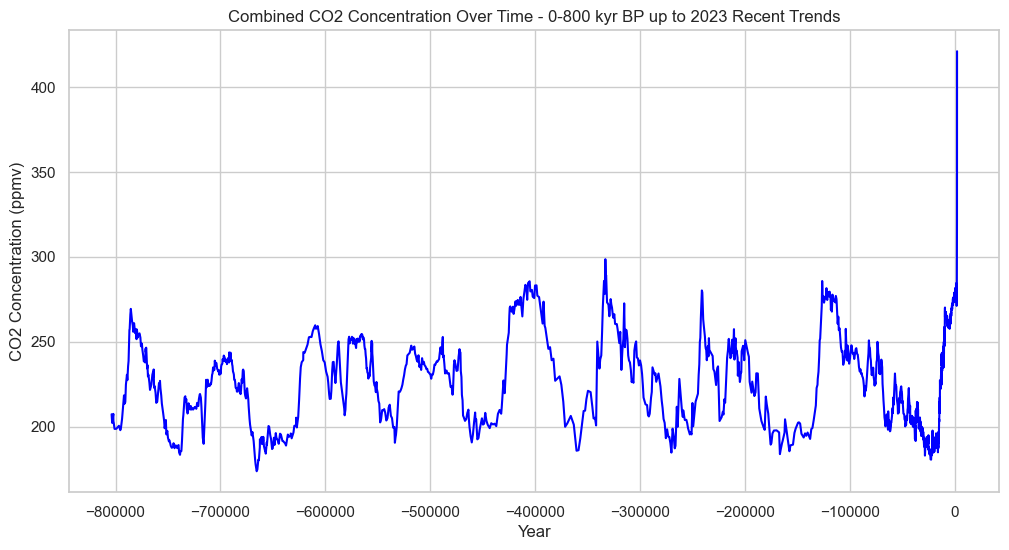

In [9]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the combined data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 (ppmv)', data=CO2_combined_data, linestyle='-', color='blue', ci=None)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Combined CO2 Concentration Over Time - 0-800 kyr BP up to 2023 Recent Trends')
plt.show()

In [10]:
# Export CO2 file 
# Export to CSV
CO2_combined_data_sorted.to_csv('./export/CO2_data.csv', index=False)

# Export to JSON
CO2_combined_data_sorted.to_json('./export/CO2_data.json', orient='records')

I have reviewed both datasets, compared, combined with recent data and exported this to csv and json formats. 
I will next reivew temperature and then compare and examine CO2 and temperature data. 

### Temperature

The EPICA (European Project for Ice Coring in Antarctica) Dome C Ice Core is a project that involves drilling and analyzing the ice cores from the Dome C region of Antarctica. Deuterium data from the EPICA Dome C Ice Core refers to measurements of deuterium in water molecules (H₂O) found in ice layers, it provides information about the isotopic composition of hydrogen in the ice. Deuterium is a stable isotope of hydrogen, and variations in its concentration in ice cores can be used to determine past temperature changes. Warmer periods generally correspond to higher deuterium concentrations, while colder periods correspond to lower concentrations.

The temperature estimates derived from the deuterium data are based on the understanding of the relationship between isotopic composition and temperature. By analyzing the isotopic composition of the ice, scientists can reconstruct temperature variations over time and create a temperature record for the past.

I will now examine temperature using the two datasets provided in this coursework. 

Both datasets are based on the same paper, Jouzel et al. (2007) Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years., Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007., https://www.science.org/doi/10.1126/science.1141038. 

The EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates, https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt, replaces the age model, includes EDC3, the previous version of this file dated 10/16/2007 erroneously included the older EDC1-EDC2 age model.

The jouzel dataset, https://doi.pangaea.de/10.1594/PANGAEA.683655, https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fatu-main-mdl-euwest1.s3.eu-west-1.amazonaws.com%2F19%2F55%2F1955125b588a5aa124dfbef3867a263530aae115%3Fresponse-content-disposition%3Dinline%253B%2520filename%253D%2522epicaDC.deuttemp.EDC3-AICC.xls%2522%26response-content-type%3Dapplication%252Fvnd.ms-excel%26X-Amz-Content-Sha256%3DUNSIGNED-PAYLOAD%26X-Amz-Algorithm%3DAWS4-HMAC-SHA256%26X-Amz-Credential%3DAKIAWRN6GJFLWCMOG6H7%252F20240118%252Feu-west-1%252Fs3%252Faws4_request%26X-Amz-Date%3D20240118T141223Z%26X-Amz-SignedHeaders%3Dhost%26X-Amz-Expires%3D21577%26X-Amz-Signature%3Dd76ca787237205a3c5ad9815b452e9ad40a041d94ad7697bec57dc8ec4ae357b&wdOrigin=BROWSELINK, includes a new chronology, AICC2012 age scale, which replaces the widely used EDC3 age scale. This scale uses modern Bayesian techniques to incorporate data from several different cores, along with improved dates and uncertainty estimates for individual age markers and synchronisations between cores. Based on this I will use this dataset for the project. 

I will display both datasets and examine both below. 

### EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

The below consists of the following columns, I will only use column 3 and 5. This dataset age scale goes up to the year 1912.

Column 1: Bag number (55 cm sample)
Column 2: Top depth (m)
Column 3: EDC3 age scale (years before year 1950)
Column 4: dD data (per mille with respect to SMOW)
Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)

                 Age  Temperature           Year
count    5785.000000  5785.000000    5785.000000
mean   190506.560624    -4.580228 -188556.140017
std    192554.547328     3.446971  192554.699923
min        38.373790   -10.580000 -799712.000000
25%     46793.812500    -7.450000 -271388.000000
50%    122110.190000    -5.200000 -120160.000000
75%    273338.430000    -1.820000  -44843.000000
max    801662.000000     5.460000    1912.000000


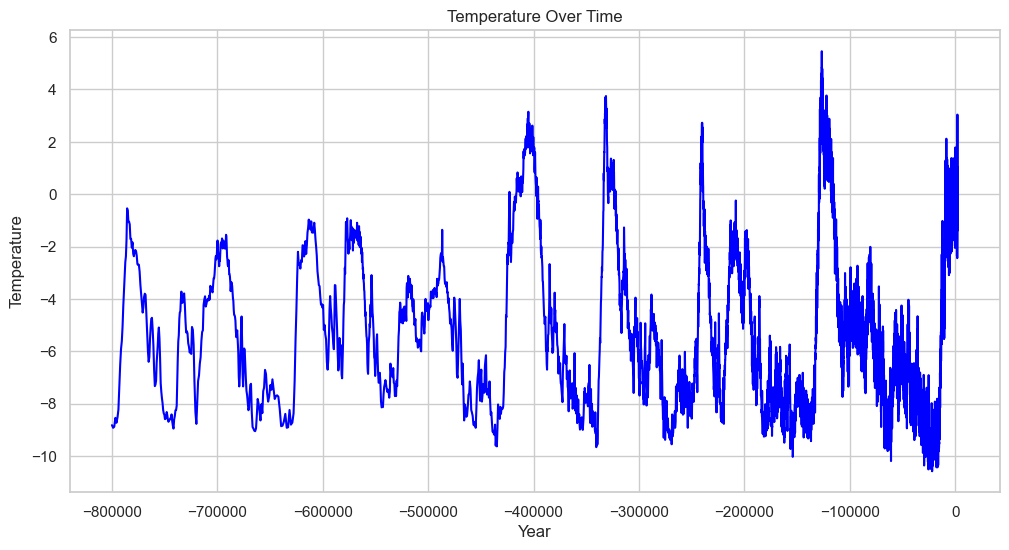

In [11]:
# Specify the path to your text file
file_path = './data/edc3deuttemp2007.txt'

# Read the specified text file into a Pandas DataFrame
edc = pd.read_csv(file_path, delim_whitespace=True, skiprows=91)

# Drop specified columns
columns_to_drop = ['Bag', 'ztop', 'Deuterium']
edc = edc.drop(columns=columns_to_drop, axis=1)
#print(edc.isnull().sum())
edc.dropna(inplace=True)

# Filter for necessary columns to correct icecore year
edc['Year'] = 1950 - edc['Age'].astype(int)
# Display the modified DataFrame
print(edc.describe())

# Plot 'Year' and 'Temperature' columns are present in the DataFrame 'edc'
sns.set(style="whitegrid")

# Plot the temperature data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Temperature', data=edc, linestyle='-', color='blue', ci=None)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.show()

### EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA

As described above the following dataset, https://doi.pangaea.de/10.1594/PANGAEA.683655, https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fatu-main-mdl-euwest1.s3.eu-west-1.amazonaws.com%2F19%2F55%2F1955125b588a5aa124dfbef3867a263530aae115%3Fresponse-content-disposition%3Dinline%253B%2520filename%253D%2522epicaDC.deuttemp.EDC3-AICC.xls%2522%26response-content-type%3Dapplication%252Fvnd.ms-excel%26X-Amz-Content-Sha256%3DUNSIGNED-PAYLOAD%26X-Amz-Algorithm%3DAWS4-HMAC-SHA256%26X-Amz-Credential%3DAKIAWRN6GJFLWCMOG6H7%252F20240118%252Feu-west-1%252Fs3%252Faws4_request%26X-Amz-Date%3D20240118T141223Z%26X-Amz-SignedHeaders%3Dhost%26X-Amz-Expires%3D21577%26X-Amz-Signature%3Dd76ca787237205a3c5ad9815b452e9ad40a041d94ad7697bec57dc8ec4ae357b&wdOrigin=BROWSELINK, includes a new chronology, AICC2012 age scale, which replaces the widely used EDC3 age scale. The dataset goes up to the year 2005. 

            AICC2012  Temperature           Year
count    5819.000000  5819.000000    5819.000000
mean   192715.210134   213.474721 -190764.879361
std    195698.666350     3.130075  195698.753071
min       -55.000000   207.900000 -819888.000000
25%     46505.000000   210.900000 -275100.500000
50%    121574.666700   212.900000 -119624.000000
75%    277050.500000   216.000000  -44554.500000
max    821838.000000   223.100000    2005.000000


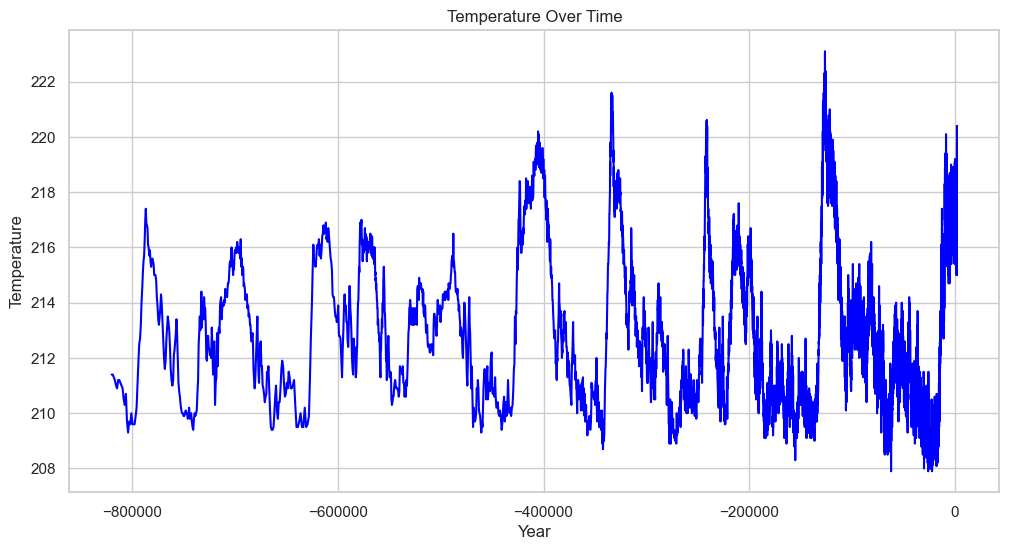

In [12]:
# Jouzel AICC data scale
# Specify the path to your Excel file
file_path = './data/epicaDC.deuttemp.EDC3-AICC.xlsx'

# Read the specified sheet into a Pandas DataFrame
aicc = pd.read_excel(file_path)
# Drop specified columns
columns_to_drop = ['bag', 'ztop', 'EDC3béta', 'deutfinal', 'acc-EDC3beta']
aicc = aicc.drop(columns=columns_to_drop, axis=1)
# Rename the 'temp' column to 'Temperature' 
aicc.rename(columns={'temp': 'Temperature'}, inplace=True)
#print(edc.isnull().sum())
#aicc.dropna(inplace=True)
#print(aicc.columns)

# Filter for necessary columns to correct ice core year
aicc['Year'] = 1950 - aicc['AICC2012'].astype(int)

#aicc['Celsius temp'] = aicc['Temperature'] - 273.15
print(aicc.describe())

# Plot the temperature data
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Temperature', data=aicc, linestyle='-', color='blue', ci=None)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.show()

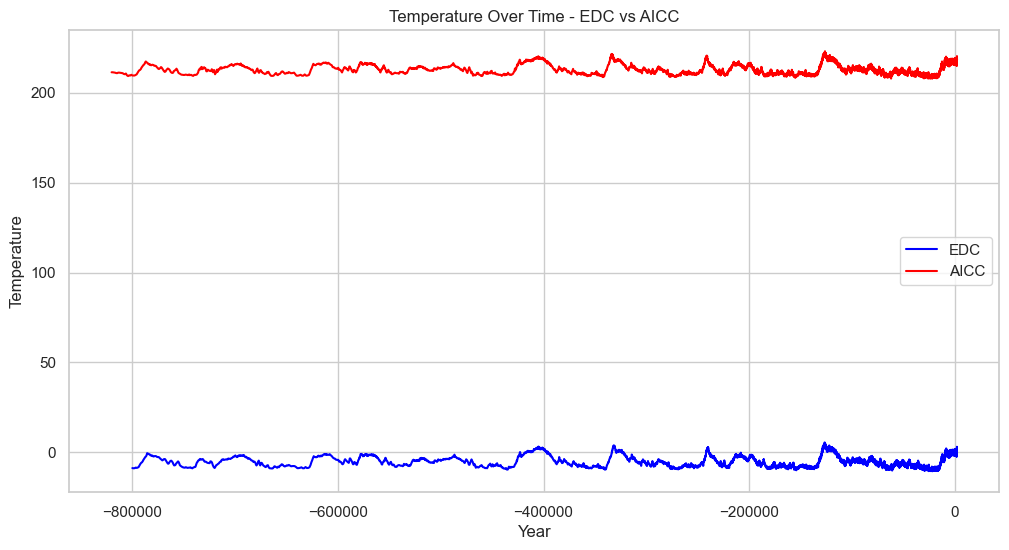

In [13]:
# Plot the temperature data for 'edc'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Temperature', data=edc, linestyle='-', color='blue', ci=None, label='EDC')

# Plot the temperature data for 'aicc'
sns.lineplot(x='Year', y='Temperature', data=aicc, linestyle='-', color='red', ci=None, label='AICC')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over Time - EDC vs AICC')

# Show legend to distinguish between 'EDC' and 'AICC'
plt.legend()
plt.show()

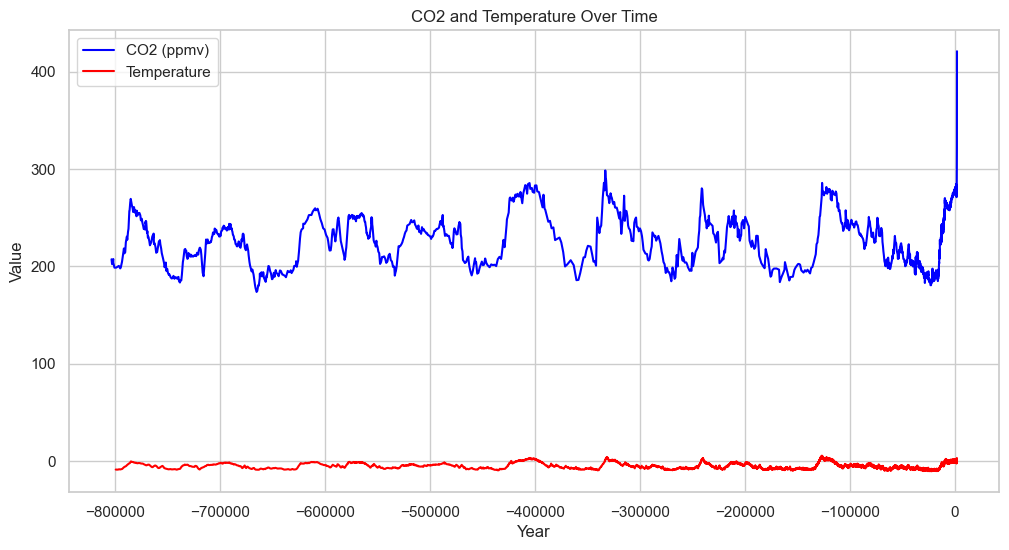

In [14]:
# Plot 'CO2' and 'Temperature' over time
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'co2_data' has columns 'Year' and 'CO2' and 'temp_data' has columns 'Year' and 'Temperature'
sns.lineplot(x='Year', y='CO2 (ppmv)', data=CO2_combined_data, linestyle='-', color='blue', label='CO2 (ppmv)', ci=None)
sns.lineplot(x='Year', y='Temperature', data=edc, linestyle='-', color='red', label='Temperature', ci=None)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('CO2 and Temperature Over Time')
plt.legend()  # Show legend for different lines
plt.show()


### Temporature Anomoly

A temperature anomaly is a deviation or departure from a long-term average or baseline temperature. It is often used in climate science to describe how much a temperature measurement at a specific time and location differs from the long-term average for that location.It helps in the understanding of variations in temperature patterns, track climate trends, and identify regions experiencing unusual warmth or cold relative to historical norms.

The baseline period is typically a fixed number of years, providing a reference point for comparison. 

The calculation of a temperature anomaly involves subtracting the long-term average temperature from the observed temperature at a given time. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value.

The below shows a global time temperature anomoly series for the period 1850 - 2023. This highlights the continuous upwards trends in temperature levels with the year 2023 the warmest year since global records began in 1850.

Year       0
Anomaly    0
dtype: int64
              Year     Anomaly
count   174.000000  174.000000
mean   1936.500000    0.054023
std      50.373604    0.370315
min    1850.000000   -0.540000
25%    1893.250000   -0.210000
50%    1936.500000   -0.050000
75%    1979.750000    0.185000
max    2023.000000    1.440000


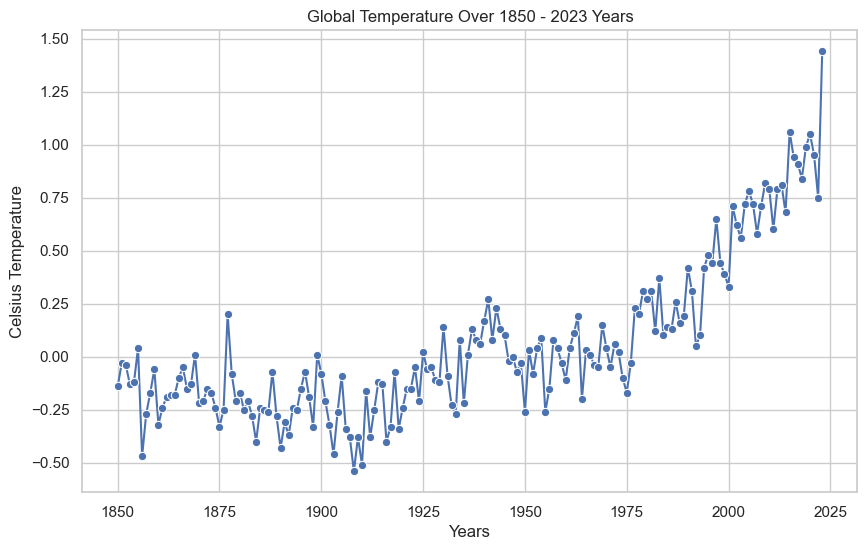

In [15]:
# Specify the path to your Excel file
file_path = './data/Global Time Series_data.csv'

# Base Period: 1850-2023, Degrees Celsius

# Read the specified sheet into a Pandas DataFrame
global_temp = pd.read_csv(file_path, skiprows=4)
print(global_temp.isnull().sum())
print(global_temp.describe())
global_temp.head()
# Plot 'Corrected Years' and 'Celsius temp' 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Anomaly', data=global_temp, marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Celsius Temperature')
plt.title('Global Temperature Over 1850 - 2023 Years')
plt.grid(True)
plt.show()

###  Methane



Carbon dioxide, methane, nitrous oxide, and certain manufactured gases called halogenated gases (gases that contain chlorine, fluorine, or bromine) become well mixed throughout the global atmosphere because of their relatively long lifetimes and because of transport by winds. Concentrations of these greenhouse gases are measured in parts per million (ppm), parts per billion (ppb), or parts per trillion (ppt) by volume. In other words, a concentration of 1 ppb for a given gas means there is one molecule of that gas in every 1 billion molecules of air. Some halogenated gases are considered major greenhouse gases due to their very high global warming potentials and long atmospheric lifetimes even if they only exist at a few ppt. 



Here I will examine Methane CH4 as another paleo/modern feature affecting climate change. 

Methane (CH4) is a powerful greenhouse gas, and is the second-largest contributor to climate warming after carbon dioxide (CO2). A molecule of methane traps more heat than a molecule of CO2, but methane has a relatively short lifespan of 7 to 12 years in the atmosphere, while CO2 can persist for hundreds of years or more.

Methane (CH4) is a colorless, odorless and highly flammable gas. It is composed of carbon and hydrogen. It comes from both natural sources and human activities. An estimated 60% of today’s methane emissions are the result of human activities. The largest sources of methane are agriculture, fossil fuels, and decomposition of landfill waste. Natural processes account for 40% of methane emissions, with wetlands being the largest natural source.  

The concentration of methane in the atmosphere has more than doubled over the past 200 years, it is responsible for around 30% of the rise in global temperatures since the industrial revolution, reaching over 1,800 ppb in recent years and rapid and sustained reductions in methane emissions are key to limit near-term warming and improve air quality.

Two key characteristics determine the impact of different greenhouse gases on the climate: the length of time they remain in the atmosphere and their ability to absorb energy. Methane has a much shorter atmospheric lifetime than carbon dioxide (CO2) but absorbs much more energy while it exists in the atmosphere. Methane also affects air quality because it can lead to ground level (tropospheric) ozone, a dangerous air pollutant. Methane leaks can also pose explosion hazards.

While it is relatively simple to measure the amount of methane in the atmosphere, it’s harder to pinpoint where it’s coming from. NASA scientists are using several methods to track methane emissions.

As a potent driver of climate change, methane's impact on global warming is over 25 times greater than that of carbon dioxide over a century, making it a focus of environmental concern and mitigation efforts.

Below I will display Global Atmospheric Concentrations of Methane Over Time and also highlight in the increase in more recent times and compare these trends with CO2. 

In [16]:
# Global Atmospheric Concentrations of Methane Over Time
# Specify the path to your Excel file
file_path = './data/ghg-concentrations_fig-2.csv'

# Read the specified sheet into a Pandas DataFrame
methane = pd.read_csv(file_path, skiprows=7)
methane.rename(columns={
    'Ice core measurements': 'Year (negative values = BC)',
    'Unnamed: 1': 'EPICA_Dome_C',
    'Unnamed: 2': 'Law_Dome',
    'Unnamed: 3': 'Cape_Grim, Australia',
    'Unnamed: 4': 'Mauna_Loa, Hawaii',
    'Unnamed: 5': 'Shetland Islands, Scotland'
}, inplace=True)
#print(methane.info())
#print(methane.isnull().sum())
#print(methane.describe())
#methane.head()
methane

,Year (negative values = BC),EPICA_Dome_C,Law_Dome,"Cape_Grim, Australia","Mauna_Loa, Hawaii","Shetland Islands, Scotland"
0,-797446.1,399.3,NaN,NaN,NaN,NaN
1,-796467.4,457.8,NaN,NaN,NaN,NaN
2,-795327.0,396.1,NaN,NaN,NaN,NaN
3,-794369.7,418.0,NaN,NaN,NaN,NaN
4,-792988.0,428.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2208,2017.0,NaN,NaN,"1,798.62","1,865.50",NaN
2209,2018.0,NaN,NaN,"1,810.81","1,871.53",NaN
2210,2019.0,NaN,NaN,"1,816.61","1,882.55",NaN
2211,2020.0,NaN,NaN,"1,824.70","1,891.47",NaN


C:\Users\sarah\AppData\Local\Temp\ipykernel_15976\1105101235.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  methane['CH4'] = methane[['EPICA', 'Law Dome', 'Mauna Loa, Hawaii']].mean(axis=1)


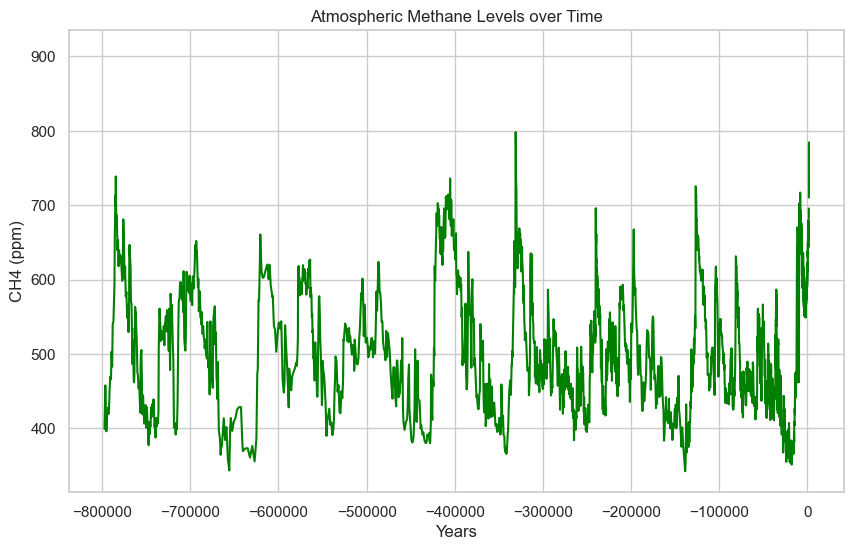

In [32]:
# Read in your dataset
file_path = './data/ghg-concentrations_fig-2.csv'
methane = pd.read_csv(file_path, skiprows=7, usecols=[0, 1, 2, 3, 4, 5]) 
methane.rename(columns={'Ice core measurements': 'Corrected Years', 'Unnamed: 1': 'EPICA', 'Unnamed: 2': 'Law Dome', 'Unnamed: 3': 'Cape Grim, Australia', 'Unnamed: 4': 'Mauna Loa, Hawaii', 'Unnamed: 5': 'Shetland Islands, Scotland'}, inplace=True)

# Convert 'Corrected Years' to integers
methane['Corrected Years'] = methane['Corrected Years'].astype(float).astype(int)

# Keep only relevant columns
methane = methane[['Corrected Years', 'EPICA', 'Law Dome', 'Cape Grim, Australia', 'Mauna Loa, Hawaii', 'Shetland Islands, Scotland']]

# Creating another column with the combined timeline
methane['CH4'] = methane[['EPICA', 'Law Dome', 'Mauna Loa, Hawaii']].mean(axis=1)

# Plotting Methane levels
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the average data
ax1.plot(methane['Corrected Years'], methane['CH4'], 'green', label="Average")
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4 (ppm)')
plt.title("Atmospheric Methane Levels over Time")

# Show the plot
plt.show()


   year     mean   unc
0  1984  1644.85  0.67
1  1985  1657.29  0.59
2  1986  1670.09  0.74
3  1987  1682.70  0.49
4  1988  1693.16  0.67


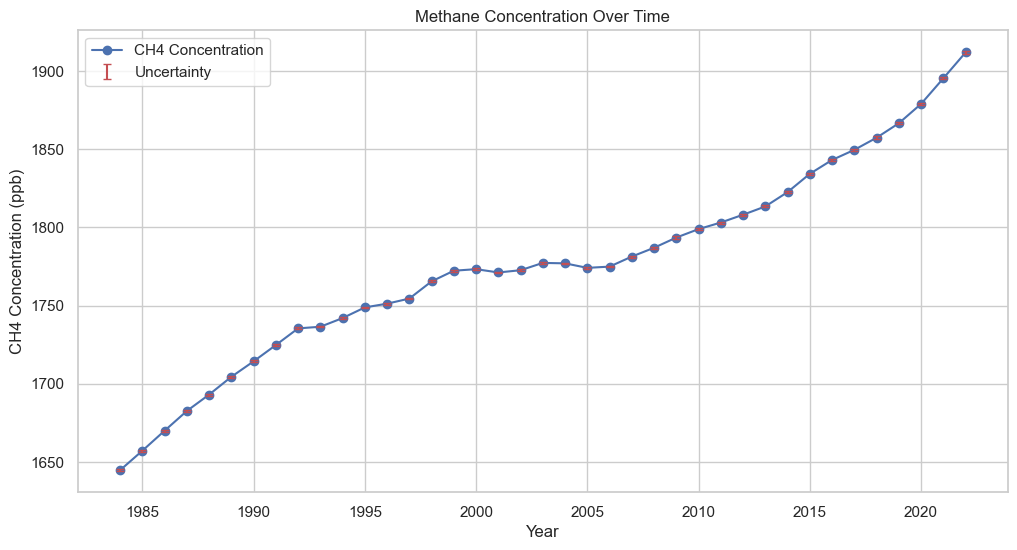

In [33]:
# Global Atmospheric Concentrations of Methane recent years

# Specify the path to your text file
file_path = './data/ch4_annmean_gl.txt'

# Read the specified file into a Pandas DataFrame, skipping comment lines
methane_data = pd.read_csv(file_path, delim_whitespace=True, skiprows=45, comment='#', names=['year', 'mean', 'unc'])

# Display the first few rows of the DataFrame
print(methane_data.head())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(methane_data['year'], methane_data['mean'], marker='o', linestyle='-', color='b', label='CH4 Concentration')
plt.errorbar(methane_data['year'], methane_data['mean'], yerr=methane_data['unc'], linestyle='None', color='r', label='Uncertainty', capsize=3)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CH4 Concentration (ppb)')
plt.title('Methane Concentration Over Time')
plt.legend()
plt.show()



### Irish Context

Long Term Data Sets
Rainfall time series from 1850-2010 for Ireland.
Homogenisation and analysis of an expanded long-term monthly rainfall network for the Island of Ireland (1850-2010)
1850-2010 for 25 locations has been constructed by researchers at Maynooth University and Met Éireann. 

Composite Rainfall Time Series from 1711-2016 for Ireland.
A continuous 305-year (1711-2016) monthly rainfall series has been created for the Island of Ireland using two key data sources, i) a previously unpublished UK Meteorological Office Note which contains annual rainfall anomalies and corresponding proportional monthly totals based on weather diaries and early observational records for the period 1711-1977 and, ii) a long-term, homogenised monthly rainfall series for the island for the period 1850-2016.

Using estimates of long-term average precipitation sampled from the homogenised series, the new 305-year record is reconstituted and insights drawn about notable extremes, climate variability and change. The consistency of the series was evaluated using long-term observations and reconstructions of precipitation, temperature, circulation indices and the North Atlantic Oscillation. All sources were compiled from across the British-Irish Isles and screened for circularity.



1711 - rainfall over 305 years - reveals statistically significant trends in winter (increasing) and summer (decreasing).
displays year, month, mediam monthly series

Reconstruction of a long-term historical daily maximum and minimum air temperature network dataset for Ireland (1831-1968)

In [ ]:
# Specify the path to your Excel file
file_path = './data/IOI_1711_SERIES.csv'

# Read the specified sheet into a Pandas DataFrame
rainfall_ie = pd.read_csv(file_path)
#print(rainfall_ie.isnull().sum())
print(rainfall_ie)
#print(rainfall_ie.info())
#print(rainfall_ie.describe())

In [ ]:
# Plotting the Median monthly series over time
plt.figure(figsize=(12, 6))
plt.plot(rainfall_ie['Year'] + rainfall_ie['Month'] / 12, rainfall_ie['Median montly series'], label='Median Monthly Series')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Monthly Series')
plt.title('Composite Rainfall Time Series for Ireland (1711-2016)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Yearly Median: Provides information about the central tendency of monthly series for each year.
# aggregate the data by year and calculate the yearly median
yearly_median = rainfall_ie.groupby('Year')['Median montly series'].median().reset_index()

# Plotting the Median monthly series on a yearly basis
plt.figure(figsize=(12, 6))
plt.plot(yearly_median['Year'], yearly_median['Median montly series'], label='Yearly Median Monthly Series', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Monthly Series')
plt.title('Composite Rainfall Time Series for Ireland (1711-2016) - Yearly Median')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Yearly Total: Provides information about the total amount of rainfall for each year - cumulative impact of rainfall for each year

# Aggregate the data by year and calculate the yearly total
yearly_total = rainfall_ie.groupby('Year')['Median montly series'].sum().reset_index()

# Plotting the Yearly Total Monthly Series
plt.figure(figsize=(12, 6))
plt.plot(yearly_total['Year'], yearly_total['Median montly series'], label='Yearly Total Monthly Series', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Monthly Series')
plt.title('Composite Rainfall Time Series for Ireland (1711-2016) - Yearly Total')
plt.legend()
plt.grid(True)
plt.show()

provided calculates and visualizes the moving average for the Yearly Median Monthly Series in the context of your rainfall datase

In [ ]:
# Calculate the average precipitation per year
avg_precipitation_per_year = rainfall_ie.groupby('Year')['Median montly series'].mean().reset_index()

# Calculate a rolling average (e.g., 24 months) for smoothing the trend
avg_precipitation_per_year['Avg_trend'] = avg_precipitation_per_year['Median montly series'].rolling(24, min_periods=1).mean()

# Plotting the average Irish rainfall per year
plt.figure(figsize=(12, 6))
plt.plot(avg_precipitation_per_year['Year'], avg_precipitation_per_year['Median montly series'], label='Average Irish Rainfall', marker='o')
plt.plot(avg_precipitation_per_year['Year'], avg_precipitation_per_year['Avg_trend'], label='Trend (Rolling Average)', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Irish Rainfall per Year with Trend (Adapted from 1711)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate a moving average for the Yearly Median Monthly Series
yearly_median['Moving_Avg'] = yearly_median['Median montly series'].rolling(window=3, center=True).mean()

# Plotting the Yearly Median Monthly Series with Moving Average
plt.figure(figsize=(12, 6))
plt.plot(yearly_median['Year'], yearly_median['Median montly series'], label='Yearly Median Monthly Series', marker='o')
plt.plot(yearly_median['Year'], yearly_median['Moving_Avg'], label='Moving Average', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Monthly Series')
plt.title('Composite Rainfall Time Series for Ireland (1711-2016) - Yearly Median with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create a mapping of months to seasons
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter',
}

# Add a new column 'Season' based on the mapping
rainfall_ie['Season'] = rainfall_ie['Month'].map(season_mapping)

# Filter data for Summer and Winter
summer_data = rainfall_ie[rainfall_ie['Season'] == 'Summer']
winter_data = rainfall_ie[rainfall_ie['Season'] == 'Winter']

# Calculate average precipitation for Summer and Winter
average_summer_precipitation = summer_data.groupby('Year')['Median montly series'].mean()
average_winter_precipitation = winter_data.groupby('Year')['Median montly series'].mean()

# Plotting the average precipitation for Summer and Winter
plt.figure(figsize=(12, 6))
plt.plot(average_summer_precipitation.index, average_summer_precipitation, label='Average Summer Precipitation', marker='o')
plt.plot(average_winter_precipitation.index, average_winter_precipitation, label='Average Winter Precipitation', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Summer and Winter Precipitation Trends (1711-2016)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Filter data for Summer (months 4, 5, 6, 7, 8, 9) and Winter (months 10, 11, 12, 1, 2, 3)
summer_data = rainfall_ie[rainfall_ie['Month'].isin([4, 5, 6, 7, 8, 9])]
winter_data = rainfall_ie[rainfall_ie['Month'].isin([10, 11, 12, 1, 2, 3])]

# Calculate average precipitation for Summer and Winter
average_summer_precipitation = summer_data.groupby('Year')['Median montly series'].mean()
average_winter_precipitation = winter_data.groupby('Year')['Median montly series'].mean()

# Plotting the average precipitation for Summer and Winter
plt.figure(figsize=(12, 6))
plt.plot(average_summer_precipitation.index, average_summer_precipitation, label='Average Summer Precipitation', marker='o')
plt.plot(average_winter_precipitation.index, average_winter_precipitation, label='Average Winter Precipitation', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Summer and Winter Precipitation Trends (1711-2016)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Specify the folder path
csv_file_path = './export/rf_data.csv'
json_file_path = './export/rf_data.json'

# Export to CSV
rainfall_ie.to_csv(csv_file_path, index=False)
#print(f'Data exported to CSV: {csv_file_path}')

# Export to JSON
rainfall_ie.to_json(json_file_path, orient='records')
#print(f'Data exported to JSON: {json_file_path}')

### An analysis of irish Context

### References

https://www.dias.ie/wp-content/uploads/2016/07/Session2_VRath_Iretherm2016.pdf

https://www.epa.ie/publications/research/climate-change/Reserach_Report_277.pdf

https://www.universityofgalway.ie/pru/
https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr1031.pdf

https://www.rapidtables.com/convert/temperature/kelvin-to-celsius.html

https://www.ncei.noaa.gov/products/paleoclimatology/paleo-perspectives/global-warming

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide#:~:text=Based%20on%20air%20bubbles%20trapped,was%20280%20ppm%20or%20less.

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide

https://council.science/current/blog/climate-explained-why-is-the-arctic-warming-faster-than-other-parts-of-the-world/

https://education.nationalgeographic.org/resource/paleoclimatology-RL/

https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter05_FINAL.pdf

https://www.ncei.noaa.gov/access/paleo-search/study/6080

https://www.met.ie/climate/available-data/long-term-data-sets/

https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13

https://edition.cnn.com/2023/11/20/climate/2-degree-warming-limit-record-copernicus-climate-int/index.html